# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

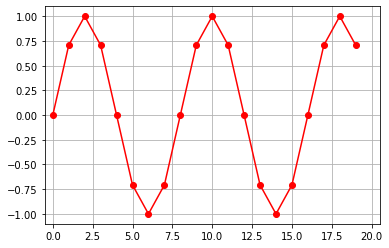

In [4]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

### 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
#### (대각선 위의 성분들이 같은 정사각 행렬)

In [5]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
#연속된3개의값을구하기위해 위와같은Toeplitz 행렬 형태로 변환
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [6]:
S.shape
#(19, 20)

(19, 20)

In [7]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape
#((18, 3, 1), (18,))

((18, 3, 1), (18,))

In [8]:
X_train[:4] 
#점하나씩 뒤로밀려가면서 3개씩; 연속된3개씩주는이유는-유추할수있으니까..

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [9]:
Y_train[:4]
#Y값이란 점3개 뒤에 나오는 점1개값 ㅋ.ㅋ

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

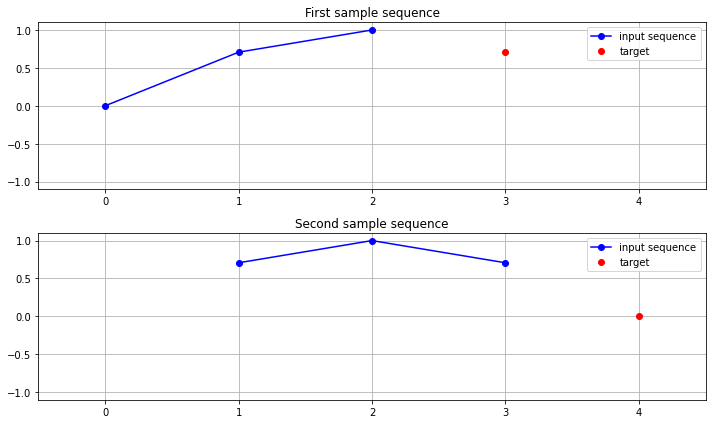

In [10]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

### 모델정의 - SimpleRNN()으로 해결

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [12]:
#잠깐만!
X_train.shape[1:]

(3, 1)

In [13]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3,1))) #노드10개(유닛),  X_train이 (18,3,1)이라서 (3,1)이라고 넣어줌...  X_train.shape[1:]라고써도됨
model.add(Dense(1, activation="linear"))
model.summary()
#3-10-1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='mse', optimizer='sgd')

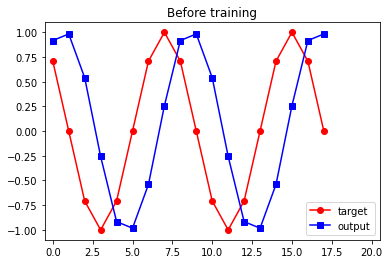

In [15]:
#학습하기전 RNN모델을 통한 아웃풋값 확인 
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [16]:
history = model.fit(X_train, Y_train, epochs=100) 

Epoch 1/100
1/1 [==============================] - 1s 781ms/step - loss: 0.7490
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5908
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4743
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3871
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3209
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2700
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2304
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1991
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1743
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1542
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1377
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1241
Epoch 13/100
1/1 [==============================] - 0s 5ms

### 결과 확인

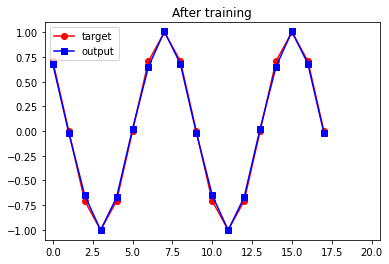

In [17]:
#RNN모델로 학습한 아웃풋값 확인
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show() 

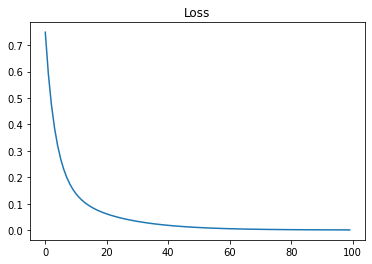

In [18]:
#로스함수는 점점 줄어들었다
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show() 

In [19]:
# 입력에 대한 weights [10개] 값을안다는것은 '학습이되었다'는 뜻?!?!?
model.weights[0]

<tf.Variable 'simple_rnn/simple_rnn_cell/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.1081319 , -0.45207852, -0.31037572, -0.11725643,  0.07662956,
        -0.12669195,  0.17407286,  0.71127635, -0.41888142, -0.23619102]],
      dtype=float32)>

In [20]:
# 10개 유닛에 대한 weights [10개가 하나]100개
model.weights[1]

<tf.Variable 'simple_rnn/simple_rnn_cell/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-2.40158811e-01,  4.15514946e-01, -3.36121857e-01,
        -3.86228234e-01,  2.04933912e-01, -8.58678594e-02,
        -5.24135232e-01,  1.64223313e-01, -3.05316508e-01,
        -1.94881365e-01],
       [-1.27566218e-01,  5.16921990e-02, -8.62181410e-02,
         1.65194079e-01, -1.28210047e-02, -2.48124808e-01,
         4.44477588e-01,  8.13541889e-01,  2.84743961e-04,
        -3.11183125e-01],
       [ 5.08949935e-01, -4.03285533e-01,  4.38602239e-01,
        -8.15637782e-02,  2.18254313e-01, -2.45153621e-01,
        -4.39148873e-01,  2.81509876e-01,  1.34632379e-01,
        -3.76309991e-01],
       [ 1.83683768e-01, -8.73207971e-02,  4.87755500e-02,
        -5.91962874e-01, -1.78253293e-01, -4.87397134e-01,
         4.23885614e-01, -2.02653587e-01, -3.62130851e-01,
        -3.73201333e-02],
       [ 1.17914908e-01,  4.97343659e-01,  3.31537396e-01,
         4.00234491e-01,  3.377

In [21]:
# bias 10개
model.weights[2]

<tf.Variable 'simple_rnn/simple_rnn_cell/bias:0' shape=(10,) dtype=float32, numpy=
array([-3.0561411e-04, -2.5729630e-06,  1.8353283e-03,  7.2334835e-05,
        1.4306064e-03,  3.6687186e-04, -2.5204191e-04, -2.4197905e-03,
        1.5532832e-03, -3.1406188e-04], dtype=float32)>

In [22]:
len(model.weights)

5

In [23]:
# Output layer에 대한 weights
model.weights[3]

<tf.Variable 'dense/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[ 0.5240259 ],
       [-0.264504  ],
       [ 0.385323  ],
       [ 0.2503889 ],
       [ 0.64520013],
       [-0.63857186],
       [-0.6356744 ],
       [ 0.67905205],
       [-0.27262923],
       [ 0.64437914]], dtype=float32)>

In [24]:
# Output layer bias
model.weights[4]

<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.00052691], dtype=float32)>

### RNN Node가 5인 경우

In [25]:
model2 = Sequential()
model2.add(SimpleRNN(5, input_shape=(3, 1)))
model2.add(Dense(1, activation="linear"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [26]:
model2.compile(loss='mse', optimizer='sgd')

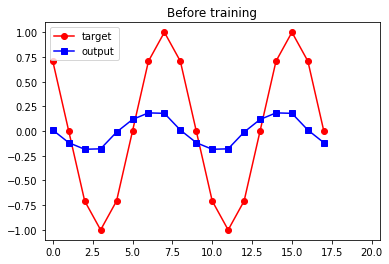

In [27]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model2.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [28]:
history2 = model2.fit(X_train, Y_train, epochs=100) 

Epoch 1/100
1/1 [==============================] - 1s 642ms/step - loss: 0.3490
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3351
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3216
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3087
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2963
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2844
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2730
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2620
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2515
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2413
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2316
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2222
Epoch 13/100
1/1 [==============================] - 0s 5ms/

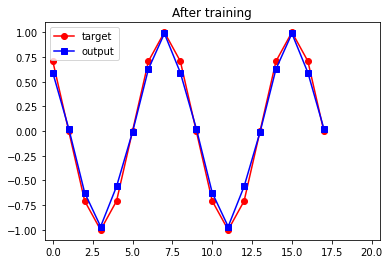

In [29]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model2.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show() 

### RNN Node가 20인 경우

In [30]:
model3 = Sequential()
model3.add(SimpleRNN(20, input_shape=(3, 1)))
model3.add(Dense(1, activation="linear"))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [31]:
model3.compile(loss='mse', optimizer='sgd')

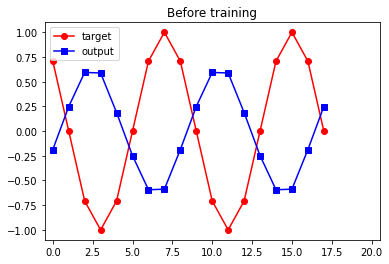

In [32]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model3.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [33]:
history3 = model3.fit(X_train, Y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 643ms/step - loss: 1.1757
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 1.0692
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.9759
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8934
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8199
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7541
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6949
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6414
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5927
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5484
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5078
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4707
Epoch 13/100
1/1 [==============================] - 0s 6ms/

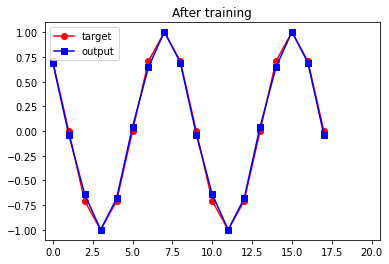

In [34]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model3.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show() 